Housing Loan - EDA

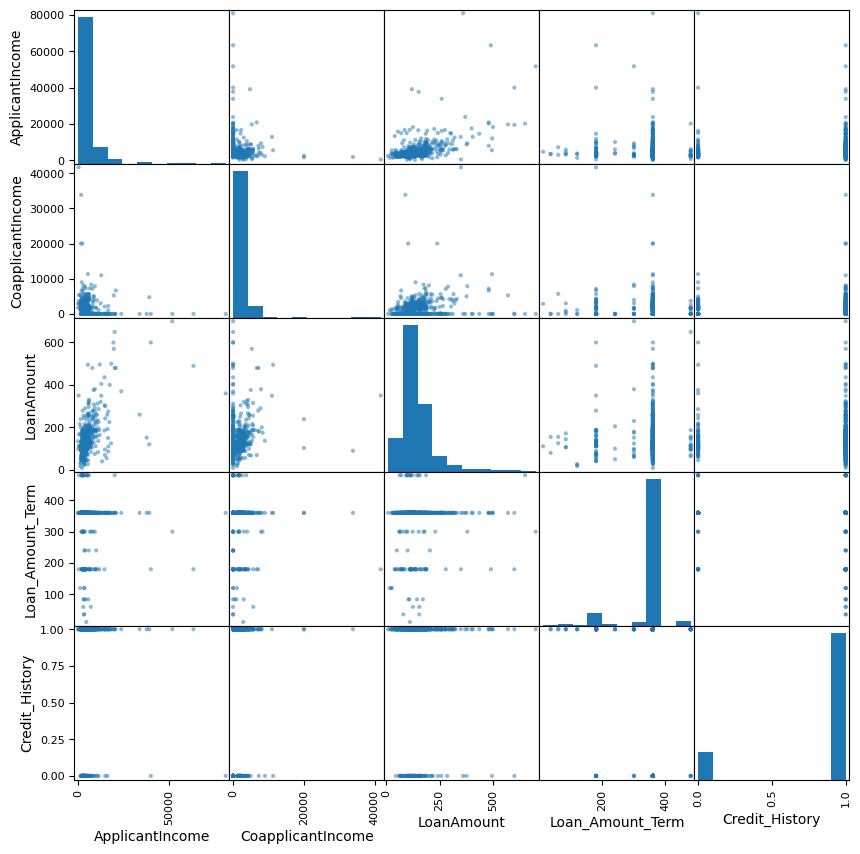

<Figure size 1200x1000 with 0 Axes>

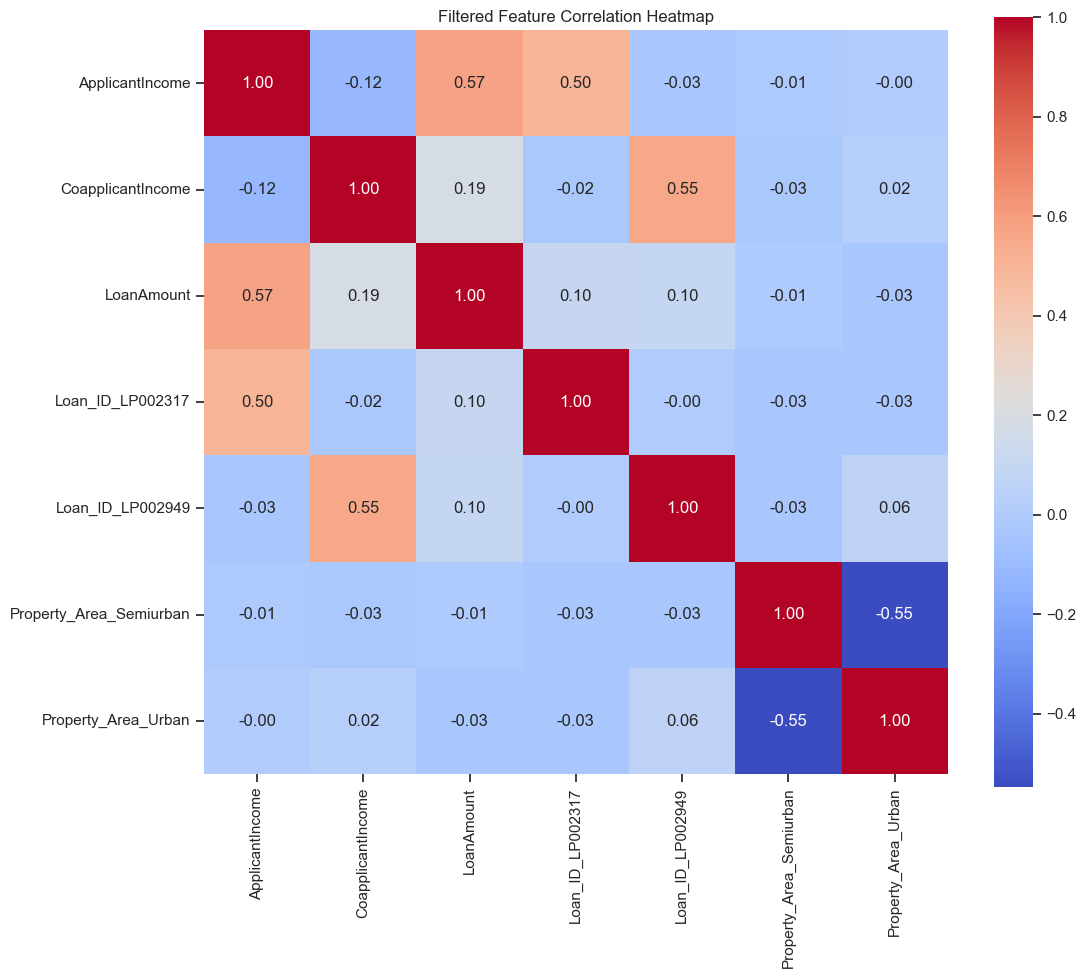

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.svm import SVC
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline

df = pd.read_csv("loan_sanction_train.csv")
labels = df['Loan_Status']  # Assuming 'Loan_Status' is the target column
df = df.drop(['Loan_Status'], axis=1)
df = pd.get_dummies(df, drop_first=True)  # Encode categorical variables

scatter_matrix(df.iloc[:, :5], figsize=(10, 10))  # Using first 5 features for visualization
plt.show()

sns.set(style="ticks", color_codes=True)
if 'species' in df.columns:
    sns.pairplot(df, hue='species')

plt.figure(figsize=(12, 10))


#housing dataset ke liya
# Calculate correlation matrix
correlation_matrix = df.corr()

# Filter features with a correlation greater than a threshold
threshold = 0.5  # Adjust this value to include more features
high_corr_var = (correlation_matrix.abs() > threshold).sum(axis=1) > 1
filtered_corr_matrix = correlation_matrix.loc[high_corr_var, high_corr_var]

# Ensure the filtered correlation matrix is not empty
if not filtered_corr_matrix.empty:
    plt.figure(figsize=(12, 10))
    sns.heatmap(
        filtered_corr_matrix,
        cmap='coolwarm',
        annot=True,
        fmt=".2f",
        cbar=True,
        square=True
    )
    plt.title('Filtered Feature Correlation Heatmap')
    plt.show()
else:
    print("No features meet the correlation threshold. Try lowering the threshold.")